In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

colNames = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name" ]
car_data = pd.read_table("auto-mpg.data",names=colNames, delim_whitespace = True)
car_data.drop(["car_name"], inplace=True, axis=1)
car_data.describe()


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [2]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object

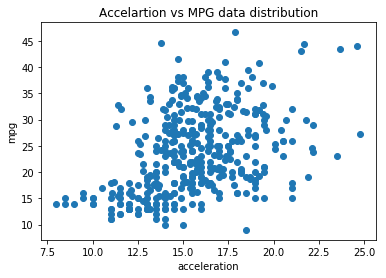

In [4]:
plt.scatter(car_data.acceleration, car_data.mpg)
plt.xlabel("acceleration")
plt.ylabel("mpg")
plt.title("Accelartion vs MPG data distribution")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(car_data.acceleration, car_data.mpg, test_size = 0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318,) (80,) (318,) (80,)


In [7]:
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 1) (80, 1) (318, 1) (80, 1)


In [8]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
predict_outcome = model.predict(X_test)

In [10]:
# Mean squared error
MSE = np.mean((predict_outcome-y_test)**2)
Rsqr = model.score(X_test, y_test)
print("Model: \nCoeff: {} \nIntercpet:{}".format(model.coef_, model.intercept_))
print("MSE value: {}".format(MSE))
print("Coeff of Determination R^2: {}".format(Rsqr))


Model: 
Coeff: [[1.12623236]] 
Intercpet:[6.00744078]
MSE value: 37.158460191311626
Coeff of Determination R^2: 0.2595249913528861


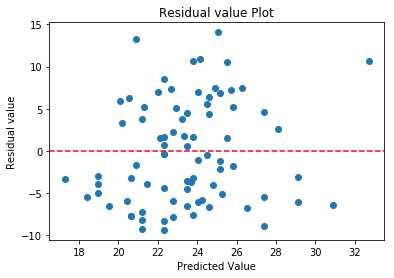

In [11]:
plt.scatter(predict_outcome, (y_test - predict_outcome))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residual value")
plt.title("Residual value Plot")

plt.show()

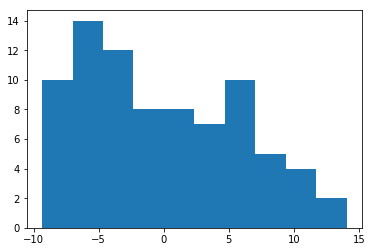

In [12]:
# Residuals value distribution
plt.hist(y_test - predict_outcome)

plt.show()

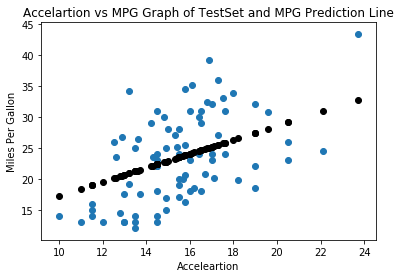

In [13]:
# this plot should be similar to y = mx+c where m = coeff, c = intercpet found earlier
plt.plot(X_test, predict_outcome, 'ko')

# Actual values in graph
plt.scatter(X_test,y_test)

plt.xlabel("Acceleartion")
plt.ylabel("Miles Per Gallon")
plt.title("Accelartion vs MPG Graph of TestSet and MPG Prediction Line")
plt.show()